In [1]:
import simplescript as s
from halpy.halpy import HAL

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
target = 200
hal = HAL("/tmp/hal")
s.start(hal)

CPU times: user 105 ms, sys: 12.6 ms, total: 118 ms
Wall time: 13.8 s


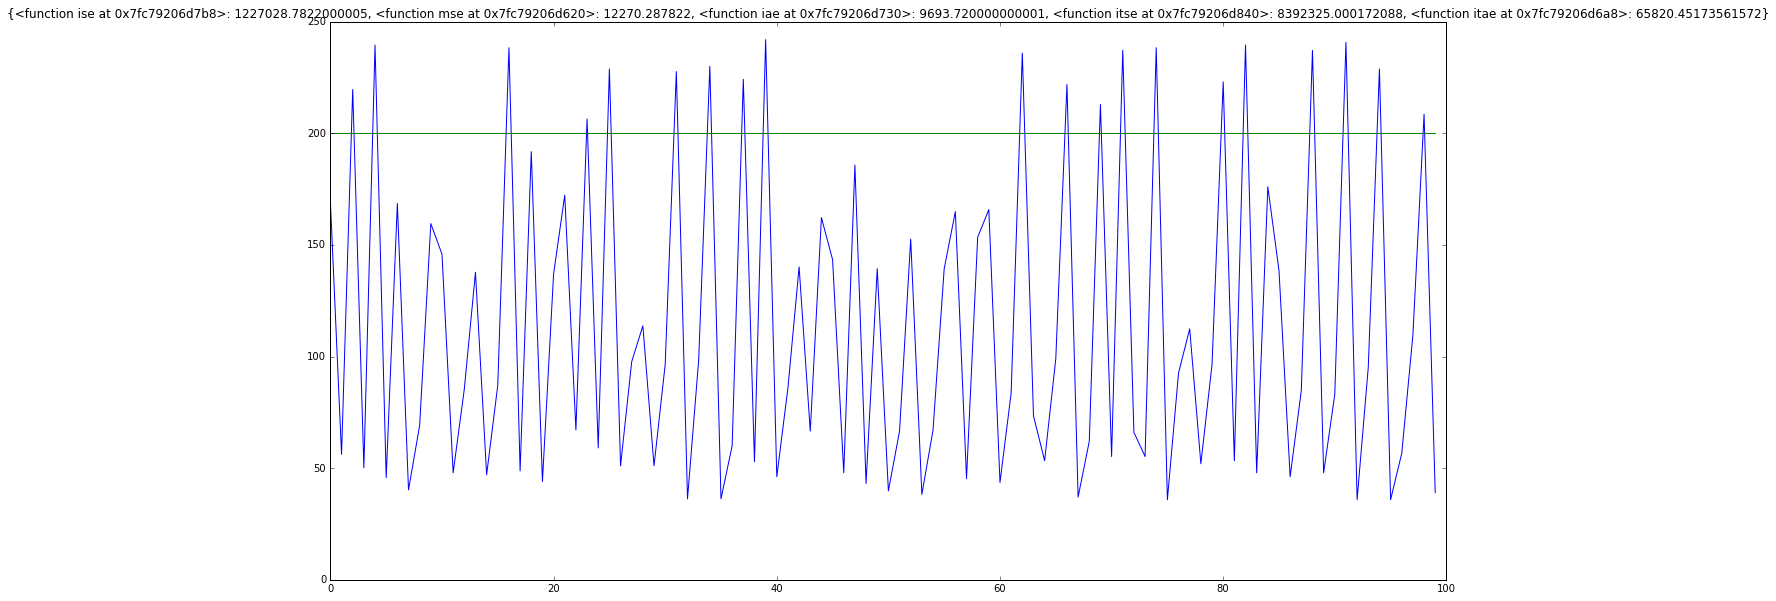

In [3]:
%%time
pid = s.PID(target, 0.115, min=0, max=255)
res = s.simule(hal, pid)
plt.plot([x[0] for x in res])
plt.plot([target for x in res])
plt.title(s.score(res, target));

In [6]:
%%time
scores = []
for kp in [x/1000 for x in range(50,200, 15)]:
    try:
        pid = s.PID(target, 0.115, min=0, max=255)
        res = s.simule(hal, pid)
        score = s.score(res, target)
        scores.append(score)
    except TypeError:
        print("Type error", kp)
    
scores_base = scores

Type error 0.095
CPU times: user 485 ms, sys: 183 ms, total: 668 ms
Wall time: 2min 7s


In [10]:
score_dict = {k: [] for k in s.FNS}
for score in scores:
    for algo, val in score.items():
        score_dict[algo].append(val)

score_dict = {k:[x/max(v) for x in v] for k,v in score_dict.items()}

{<function simplescript.iae>: [0.9747973563160143,
  0.9953643114586472,
  0.9835430572490146,
  0.9787503614644606,
  1.0,
  0.9169630426811273,
  0.9674637268550956,
  0.9607730321179191,
  0.9264272008092835],
 <function simplescript.mse>: [0.9667757234369114,
  0.9851472857827316,
  0.9743365475592274,
  0.9637684698674182,
  1.0,
  0.8804391331958342,
  0.940123437764517,
  0.9404259314723824,
  0.9000556431564913],
 <function simplescript.ise>: [0.9667757234369114,
  0.9851472857827315,
  0.974336547559228,
  0.9637684698674182,
  1.0,
  0.8804391331958346,
  0.9401234377645167,
  0.9404259314723825,
  0.900055643156491],
 <function simplescript.itse>: [0.9189125356676665,
  0.9077485680376574,
  0.9794767391328836,
  1.0,
  0.9350203213435885,
  0.7967036293127853,
  0.8828690822572902,
  0.9026955639221986,
  0.9410383738323753],
 <function simplescript.itae>: [0.9088295982863892,
  0.8907569778693504,
  0.9716015853724342,
  1.0,
  0.9100109591598269,
  0.7956624181298365,
  0

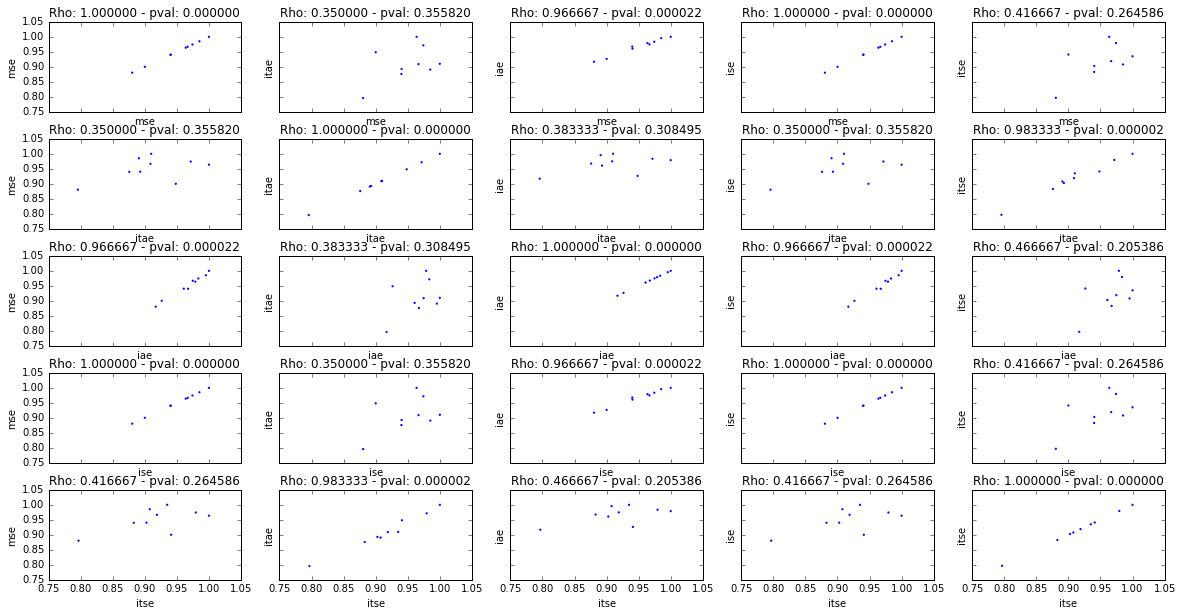

In [20]:
import scipy.stats
lfns = len(s.FNS)
fig, ax =  plt.subplots(lfns, lfns, sharex='all', sharey='all')
plt.subplots_adjust(hspace = 0.3)

for i, fni in enumerate(s.FNS):
    for j, fnj in enumerate(s.FNS):
        p = ax[i][j]
        p.scatter(score_dict[fni], score_dict[fnj], s=5, edgecolors='none')
        rho, pval = scipy.stats.spearmanr(score_dict[fni], score_dict[fnj])
        p.set_title("Rho: %f - pval: %f" % (rho, pval))
        p.axes.set_xlabel(fni.__name__)
        p.axes.set_ylabel(fnj.__name__)